# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


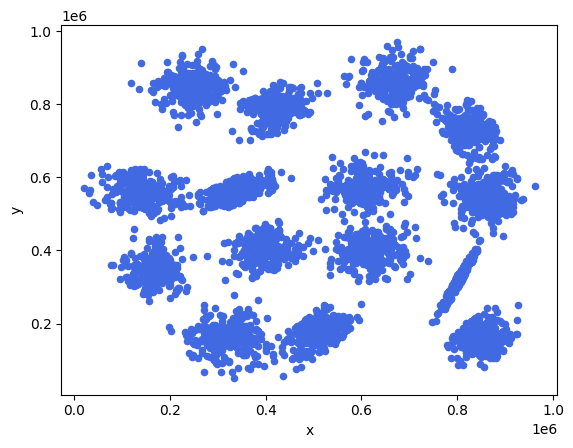

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='royalblue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE

from sklearn.cluster import KMeans
from warnings import filterwarnings as fw; fw('ignore')

inertia = []
for n in range (1, 30):
  model = KMeans(n_clusters=n, random_state=42)
  model.fit(data)
  inertia.append(model.inertia_)
inertia

#END CODE

[576807041183705.8,
 343183593424387.56,
 213509053896740.1,
 138251040835057.22,
 104935513328366.25,
 82172479166907.17,
 63577135519178.58,
 48146924629521.43,
 40427232568036.41,
 34391481278674.81,
 28911073060127.125,
 23146756787307.777,
 18350029727191.914,
 13486733767168.459,
 8917615616867.258,
 8654195380138.777,
 8415631292726.098,
 8227282809930.557,
 8000004005435.432,
 7782061513020.172,
 7672183139126.995,
 7519773294441.791,
 7189455085478.642,
 7006296067332.918,
 6950032397189.744,
 6720946199046.6875,
 6577198007791.038,
 6390682755867.611,
 6246340608018.453]

In [ ]:
inertia_data = pd.DataFrame({'Inertia': inertia}, index=[j for j in range(1, 30)])

Text(0.5, 1.0, 'elbow method')

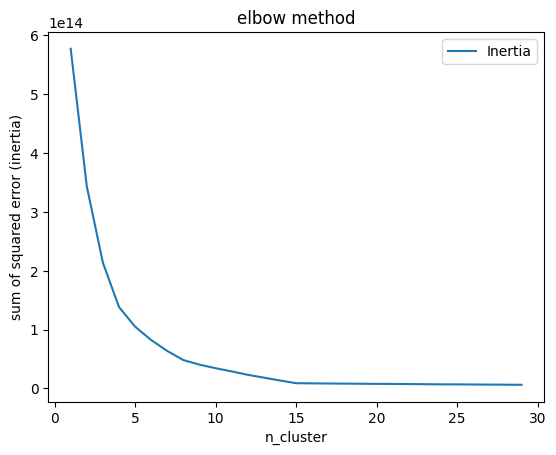

In [ ]:
inertia_data.plot(kind='line')
plt.ylabel('sum of squared error (inertia)')
plt.xlabel('n_cluster')
plt.title('elbow method')

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
kmeans = cluster.KMeans(n_clusters=15, random_state=42)
kmeans.fit(data)
label = kmeans.fit_predict(data)
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = label
result.head()
#END CODE

,x,y,cluster
0,664159,550946,5
1,665845,557965,5
2,597173,575538,5
3,618600,551446,5
4,635690,608046,5


In [ ]:
kmeans.cluster_centers_

array([[852058.45259939, 157685.52293578],
       [337264.76291793, 562123.37993921],
       [823421.2507837 , 731145.27272727],
       [507818.31339031, 175610.41595442],
       [417799.69426752, 787001.99363057],
       [606574.95622896, 574455.16835017],
       [167856.14071856, 347812.71556886],
       [244654.8856305 , 847642.04105572],
       [670929.06818182, 862765.73295455],
       [801616.78164557, 321123.34177215],
       [139395.22898551, 558143.94202899],
       [398870.04843305, 404924.06552706],
       [858947.9713467 , 546259.65902579],
       [320602.55      , 161521.85      ],
       [617926.67761194, 399415.94925373]])

Text(0.5, 1.0, 'K-Means Clustering')

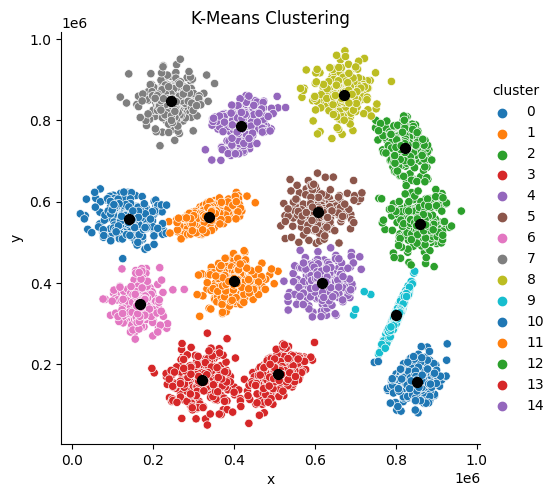

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', data=result, hue='cluster', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='o', s=50)
plt.title('K-Means Clustering')
#END CODE